In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
df=pd.read_csv("bank (1).csv")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df=df.fillna(df.mean())
df=pd.get_dummies(df)
print(df.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'deposit_no', 'deposit_yes'],
      dtype='object')


<ipython-input-4-7a9cf9a50a22>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [ ]:
x=df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y=df['deposit_yes']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pre=clf.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1166
           1       0.69      0.68      0.68      1067

    accuracy                           0.70      2233
   macro avg       0.70      0.70      0.70      2233
weighted avg       0.70      0.70      0.70      2233



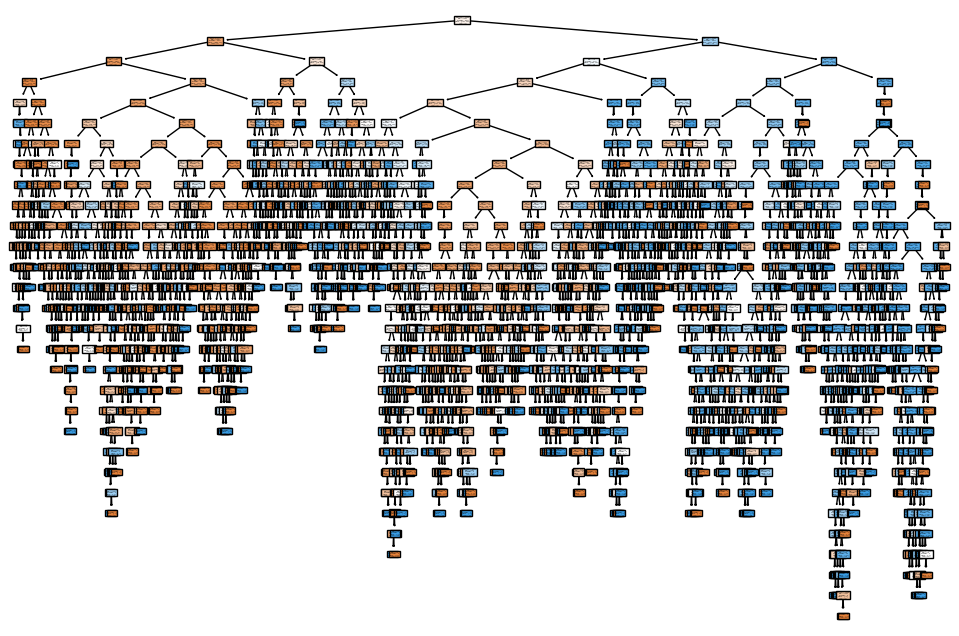

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf,feature_names=x.columns, class_names=['No','Yes'],filled=True)
plt.show()

In [ ]:
importances=clf.feature_importances_
feature_names=x.columns
feature_importance=pd.DataFrame({'Feature':feature_names,'Importance':importances})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
print(feature_importance)

    Feature  Importance
3  duration    0.429449
1   balance    0.165231
0       age    0.122724
5     pdays    0.120924
2       day    0.113874
4  campaign    0.041139
6  previous    0.006659


In [ ]:
param_grid={'max_depth':[None,5,10,15],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4]}
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_params=grid_search.best_params_
clf=DecisionTreeClassifier(**best_params)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.78      1166
           1       0.77      0.75      0.76      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [ ]:
clf_tuned=DecisionTreeClassifier(**best_params)
clf_tuned.fit(x_train,y_train)
y_pred_tuned=clf_tuned.predict(x_test)
print("Classification Report (Tuned Model):")
print(classification_report(y_test,y_pred_tuned))

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.78      0.80      0.78      1166
           1       0.77      0.75      0.76      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



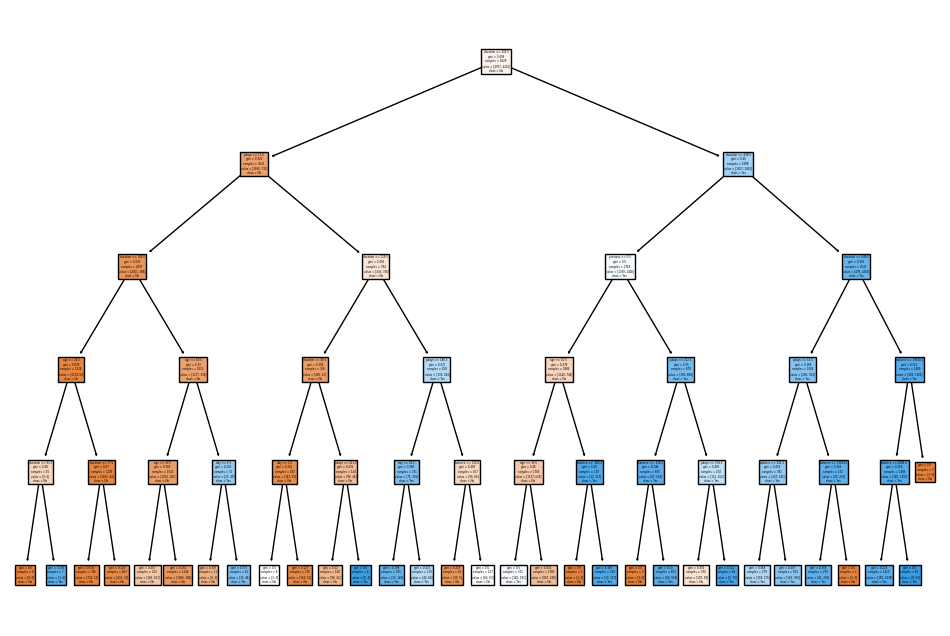

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Decision Tree")
tree.plot_tree(clf, feature_names=x.columns, class_names=['No','Yes'], filled=True)
plt.show()